In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import string
drive.mount('/content/drive/')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
os.chdir('/content/drive/My Drive/riset NLP/Covid 19')
!ls -a

'content summaries.png'       'dist content.png'    ' preprocessing.ipynb'
'content word.png'	      'dist summary'	     ProcessedData.json
'content word predicted.png'  'dist summary.png'    'result score.png'
 data_res_test_1.csv	       glove.840B.300d.txt   scoring.ipynb
 data_res_test_2.csv	       Model_Backup	     splitting.png
 data_res_test_3.csv	       modelling.ipynb	    'train loss.png'
 data_res_test_4.csv	      'news cleaned.csv'    'train val loss.png'
'dist content'		       news.csv


In [3]:
dataset = pd.read_csv('news.csv')

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...
...,...,...,...,...,...,...,...
3561,4604,['The Associated Press'],South Korea declares end to MERS virus outbreak,2015-12-23 09:07:00,South Korea on Wednesday declared a formal end...,South Korea on Wednesday declared a formal end...,https://www.cbc.ca/news/health/korea-mers-outb...
3562,4605,['The Canadian Press'],MERS virus spread in hospitals should be focus...,2014-01-28 16:07:00,The spread of MERS coronavirus infections in h...,The spread of MERS coronavirus infections in h...,https://www.cbc.ca/news/health/mers-virus-spre...
3563,4606,['Cbc News'],Ellershausen Manor is for sale,2012-11-02 01:24:00,A clasic old home with a lot of history in now...,"It's a relic of a bygone era, when wealthy Nov...",https://www.cbc.ca/news/canada/nova-scotia/ell...
3564,4607,['Cbc News'],MERS virus from camels and humans called indis...,2014-04-29 16:57:00,Camels have been implicated in a Middle Easter...,Camels have been implicated in a Middle Easter...,https://www.cbc.ca/news/health/mers-virus-from...


hapus duplicate content yang terdapat pada kolom text

In [4]:
dataset = dataset.drop_duplicates(subset="text",ignore_index=True)
dataset

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...
...,...,...,...,...,...,...,...
2750,4604,['The Associated Press'],South Korea declares end to MERS virus outbreak,2015-12-23 09:07:00,South Korea on Wednesday declared a formal end...,South Korea on Wednesday declared a formal end...,https://www.cbc.ca/news/health/korea-mers-outb...
2751,4605,['The Canadian Press'],MERS virus spread in hospitals should be focus...,2014-01-28 16:07:00,The spread of MERS coronavirus infections in h...,The spread of MERS coronavirus infections in h...,https://www.cbc.ca/news/health/mers-virus-spre...
2752,4606,['Cbc News'],Ellershausen Manor is for sale,2012-11-02 01:24:00,A clasic old home with a lot of history in now...,"It's a relic of a bygone era, when wealthy Nov...",https://www.cbc.ca/news/canada/nova-scotia/ell...
2753,4607,['Cbc News'],MERS virus from camels and humans called indis...,2014-04-29 16:57:00,Camels have been implicated in a Middle Easter...,Camels have been implicated in a Middle Easter...,https://www.cbc.ca/news/health/mers-virus-from...


fungsi untuk memuat pembobotan kata dan menyimpan dalam bentuk dict kemudian untuk setiap wordnya disimpan dalam array 300d 

In [6]:
print("before cleaning")
print("description: ", dataset.iloc[10].description)
print("text: ", dataset.iloc[10].text)

before cleaning
description:  The Saskatchewan government's latest update also reports nine new cases, bringing Saskatchewan's total to 95.
text:   Three Saskatchewan residents have recovered from the virus, the first reported to do so. The province has 95 cases now, up from 86 on Wednesday.  The government is releasing more information about cases after Premier Scott Moe pledged increased transparency.  Here's what it's like to have COVID-19, as told by a Saskatchewan resident.  Saskatchewan is among the country's top COVID-19 testers. Residential eviction hearings are suspended for the moment. Read more here. The government is also relaxing its enforcement of unpaid fines. Details here.  The first of a series of appointment-only COVID-19 treatment sites has opened in Regina.  Some good COVID-19 news finally came to Saskatchewan on Thursday. The province announced that three people have recovered from the virus. The province's latest daily update, released online, also reported nine n

In [0]:
def loadEmbeddings(filename):
    vocab2embd = {}
    with open(filename) as infile:
        for line in tqdm(infile):
            row = line.strip().split(' ')
            word = row[0].lower()
            # print(word)
            if word not in vocab2embd:
                vec = np.asarray(row[1:], np.float32)
                if len(vec) == word_vec_dim:
                    vocab2embd[word] = vec
    print('\nEmbedding Loaded.')
    return vocab2embd

In [0]:
filename = 'glove.840B.300d.txt' 
word_vec_dim = 300 # word_vec_dim = dimension of each word vectors
vocab2embd = loadEmbeddings(filename)

2196017it [03:14, 11274.93it/s]


Embedding Loaded.


list berupa dict yang memberi mapping text mengandung contractions

In [0]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

fungsi untuk membersihkan text dan melakukan contrations mapping

In [0]:
def clean(text):    
  
  def contractions_check(text_cnt):
    global contractions
    res = ""
    for word in text_cnt.split():
      if word in contractions:
        res += contractions[word] + ' '
      else:
        res += word + ' '
    return res.strip()

  text = str(text).lower().strip()
  printable = set(string.printable)
  text = "".join(list(filter(lambda x: x in printable, text)))
  text = contractions_check(text)
  return text

melakukan pembersihan pada kedua kolom text & description 

In [0]:
dataset['text'] = dataset['text'].apply(clean)
dataset['description'] = dataset['description'].apply(clean)
dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,canadian pharmacies are limiting how much medi...,canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,the yukon government has identified two places...,the yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,the senate has passed an unparalleled $2.2 tri...,the senate late wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,scientists around the world are racing to find...,scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,the latest on the coronavirus outbreak from cb...,trudeau says rules of quarantine act will be e...,https://www.cbc.ca/news/the-latest-on-the-coro...
...,...,...,...,...,...,...,...
2750,4604,['The Associated Press'],South Korea declares end to MERS virus outbreak,2015-12-23 09:07:00,south korea on wednesday declared a formal end...,south korea on wednesday declared a formal end...,https://www.cbc.ca/news/health/korea-mers-outb...
2751,4605,['The Canadian Press'],MERS virus spread in hospitals should be focus...,2014-01-28 16:07:00,the spread of mers coronavirus infections in h...,the spread of mers coronavirus infections in h...,https://www.cbc.ca/news/health/mers-virus-spre...
2752,4606,['Cbc News'],Ellershausen Manor is for sale,2012-11-02 01:24:00,a clasic old home with a lot of history in now...,"it is a relic of a bygone era, when wealthy no...",https://www.cbc.ca/news/canada/nova-scotia/ell...
2753,4607,['Cbc News'],MERS virus from camels and humans called indis...,2014-04-29 16:57:00,camels have been implicated in a middle easter...,camels have been implicated in a middle easter...,https://www.cbc.ca/news/health/mers-virus-from...


In [0]:
print("sample cleaning document")
print("description: ", dataset['description'][10])
print("text: ", dataset['text'][10])

sample cleaning document
description:  the saskatchewan government's latest update also reports nine new cases, bringing saskatchewan's total to 95.
text:  three saskatchewan residents have recovered from the virus, the first reported to do so. the province has 95 cases now, up from 86 on wednesday. the government is releasing more information about cases after premier scott moe pledged increased transparency. here's what it is like to have covid-19, as told by a saskatchewan resident. saskatchewan is among the country's top covid-19 testers. residential eviction hearings are suspended for the moment. read more here. the government is also relaxing its enforcement of unpaid fines. details here. the first of a series of appointment-onlycovid-19 treatment sites has opened in regina. some good covid-19 news finally came to saskatchewan on thursday.the province announced that three people have recovered from the virus. the province's latest daily update, released online, also reported nine

In [0]:
dataset.to_csv("news cleaned.csv", index=False)

melihat distribusi banyaknya word pada setiap document 

In [0]:
dist_text = []
dist_summary = []
for t in dataset.iterrows():
  text = word_tokenize(t[1].text)
  summary = word_tokenize(t[1].description)
  dist_text.append(len(text))
  dist_summary.append(len(summary))

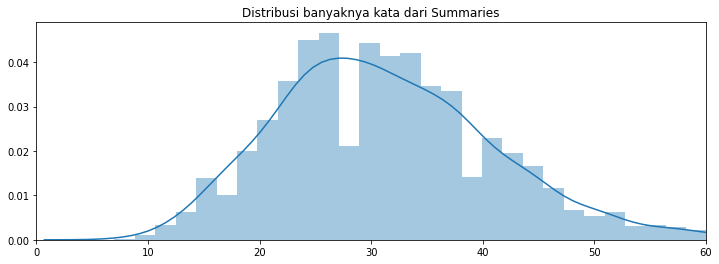

In [0]:
plt.figure(figsize=(12,4))
sns.distplot(dist_summary)
plt.xlim(0, 60)
plt.title("Distribusi banyaknya kata dari Summaries")
plt.savefig('dist summary', format='png')
plt.show()

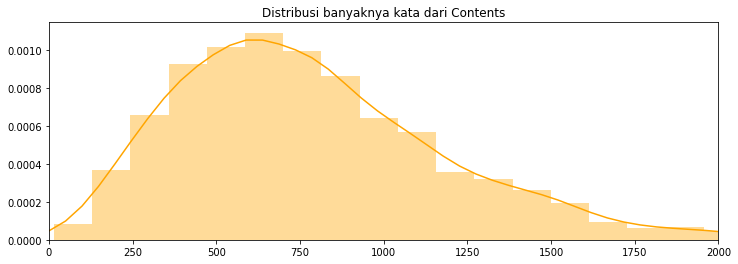

In [0]:
plt.figure(figsize=(12,4))
sns.distplot(dist_text, label='text', color="orange")
plt.xlim(0, 2000)
plt.title("Distribusi banyaknya kata dari Contents")
plt.savefig('dist content', format='png')
plt.show()

melakukan tokenize kemudian membuat bag of word dari semua term yang ada pada dataset

In [0]:
summaries = []
texts = []
counter={}
max_len_text = 250
max_len_sum = 26

for row in tqdm(dataset.iterrows(),'processing dataset'):

  clean_text = word_tokenize(row[1].text)
  clean_summary = word_tokenize(row[1].description)
  clean_text = clean_text[:max_len_text]
  clean_summary = clean_summary[:max_len_sum]

  for word in clean_text:
      if word in vocab2embd:
          counter[word]=counter.get(word,0)+1
  for word in clean_summary:
      if word in vocab2embd:
          counter[word]=counter.get(word,0)+1

  summaries.append(clean_summary)
  texts.append(clean_text)
        
print("Current size of data: "+str(len(texts)))

processing dataset: 2755it [00:17, 154.58it/s]

Current size of data: 2755


membuat vocabulary dalam bentuk dictionary kemudian melakukan sorting pada vocabulary sesuai dengan nilai yg ada pada bag of words

In [0]:
from wordcloud import WordCloud
cloud_texts = (" ").join([word for text in texts for word in text])
cloud_summaries = (" ").join([word for text in summaries for word in text])

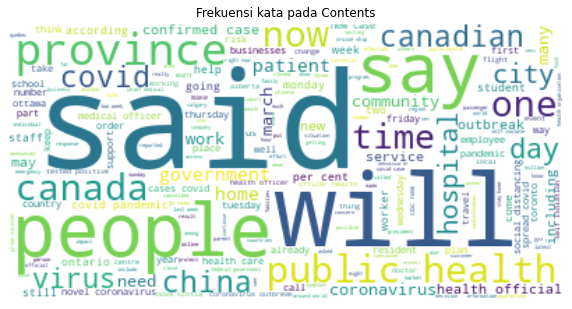

In [0]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(background_color="white").generate(cloud_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Frekuensi kata pada Contents")
plt.savefig("content word.png", format="png")
plt.show()

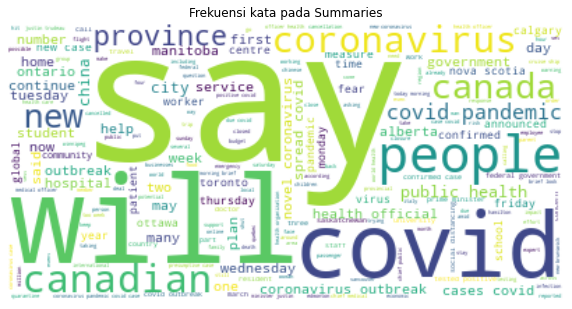

In [0]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(background_color="white").generate(cloud_summaries)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Frekuensi kata pada Summaries")
plt.savefig("content summaries.png", format="png")
plt.show()

In [0]:
vocab = [word for word in counter]
counts = [counter[word] for word in vocab]
sorted_idx = sorted(range(len(counts)), key=counts.__getitem__)
sorted_idx.reverse()
vocab = [vocab[idx] for idx in sorted_idx]
special_tags = ["<UNK>","<GO>","<PRED>","<EOS>","<PAD>"]

In [0]:
print("total vocab without special tags", len(vocab))

total vocab without special tags 22150


penambahan beberapa special token
- unk : token untuk word yang tidak dapat diketahui vocabulary
- pred : token untuk mengantisipasi terlalu besarnya word value
- eos : menandakan akhir dari sequence
- go : awalan untuks sequence
- pad : padding token untuk sequence yang panjanganya kurang dari maximum sequence

In [0]:
vocab2embd['<UNK>'] = np.random.randn(word_vec_dim)
vocab2embd['<GO>'] = np.random.randn(word_vec_dim)
vocab2embd['<PRED>'] = np.random.randn(word_vec_dim)
vocab2embd['<EOS>'] = np.random.randn(word_vec_dim)
vocab2embd['<PAD>'] = np.zeros(word_vec_dim)

update pembobotan text sesuai dengan token yang baru ditambahkan

In [0]:
max_vocab = 100000

if len(vocab) > max_vocab-len(special_tags):
    vocab = vocab[0:max_vocab-len(special_tags)]    

vocab += special_tags 

vocab_dict = {word:i for i,word in enumerate(vocab)}

embeddings = []
for word in vocab:
    embeddings.append(vocab2embd[word].tolist())

In [0]:
print("total embeddings", len(embeddings))

total embeddings 22155


membuat random terhadap test dataset akan tetapi menyimpan index untuk pengaksesan

In [0]:
import random

texts_idx = [idx for idx in range(0,len(texts))]
random.shuffle(texts_idx)

texts = [texts[idx] for idx in texts_idx]
summaries = [summaries[idx] for idx in texts_idx]

In [0]:
print("text", texts[0])
print("summary", summaries[0])

text ['canadian', 'snowbirds', 'are', 'being', 'advised', 'to', 'return', 'home', 'as', 'the', 'covid-19', 'pandemic', 'advances', 'in', 'the', 'u.s.', 'and', 'access', 'to', 'out-of-country', 'medical', 'insurance', 'comes', 'to', 'an', 'end', 'for', 'some', 'travellers', '.', 'speaking', 'to', 'reporters', 'from', 'self-isolation', 'monday', ',', 'prime', 'minister', 'justin', 'trudeau', 'made', 'a', 'plea', 'to', 'all', 'canadians', 'abroad', ':', 'come', 'home', 'now', 'or', 'risk', 'being', 'stranded', 'as', 'countries', 'close', 'their', 'borders', 'and', 'limit', 'flights', '.', 'the', 'canadian', 'snowbirds', 'association', 'says', 'it', 'is', 'advising', 'all', 'of', 'its', 'members', 'to', 'heed', 'the', 'pm', "'s", 'adviceand', 'head', 'for', 'home', '.', 'the', 'advocacy', 'group', ',', 'which', 'represents', 'tens', 'of', 'thousands', 'of', 'canadians', 'who', 'winter', 'in', 'warmer', 'climes', ',', 'has', 'told', 'members', 'to', 'leave', 'their', 'residences', 'in', 'pl

membuat split data dimana training 80% (train 70% + validation 10%), 20% adalah data testing

In [0]:
train_len = int(.7*len(texts))
val_len = int(.1*len(texts))

train_summaries = summaries[0:train_len]
train_texts = texts[0:train_len]

val_summaries = summaries[train_len:val_len+train_len]
val_texts = texts[train_len:train_len+val_len]

test_summaries = summaries[train_len+val_len:]
test_texts = texts[train_len+val_len:]

In [0]:
print("train_text: ", len(train_texts))
print("val_text: ", len(val_texts))
print("test_texts: ", len(test_texts))

train_text:  1928
val_text:  275
test_texts:  552


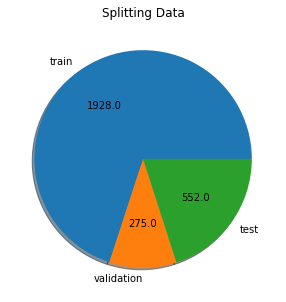

In [0]:
# Pie chart
import numpy as np

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

labels = ['train', 'validation', 'test']
sizes = np.array([len(train_texts), len(val_texts), len(test_texts)])
fig1, ax1 = plt.subplots()
fig1.set_size_inches(5,5)
ax1.pie(sizes, labels=labels, autopct=absolute_value, shadow=True)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title("Splitting Data")
plt.savefig("splitting.png",format="png")
plt.show()

membagi dataset menjadi beberapa batch setiap batch terdiri dari 32 document (maximum) . kemudian juga dilakukan penyimpanan panjang asli dari document sebelum di tokenisasi

In [0]:
def bucket_and_batch(texts, summaries, batch_size=16):
    
    global vocab_dict
    vocab2idx = vocab_dict
    
    PAD = vocab2idx['<PAD>']
    EOS = vocab2idx['<EOS>']
    UNK = vocab2idx['<UNK>']

    true_seq_lens = np.zeros((len(texts)), dtype=int)
    for i in range(len(texts)):
        true_seq_lens[i] = len(texts[i])

    sorted_by_len_indices = np.flip(np.argsort(true_seq_lens), 0)

    sorted_texts = []
    sorted_summaries = []

    for i in range(len(texts)):
        sorted_texts.append(texts[sorted_by_len_indices[i]])
        sorted_summaries.append(summaries[sorted_by_len_indices[i]])

    i = 0
    batches_texts = []
    batches_summaries = []
    batches_true_seq_in_lens = []
    batches_true_seq_out_lens = []

    while i < len(sorted_texts):

        if i+batch_size > len(sorted_texts):
            batch_size = len(sorted_texts)-i

        batch_texts = []
        batch_summaries = []
        batch_true_seq_in_lens = []
        batch_true_seq_out_lens = []

        max_in_len = len(sorted_texts[i])
        max_out_len = max([len(sorted_summaries[j])+1 for j in range(i,i+batch_size)])

        for j in range(i, i + batch_size):

            text = sorted_texts[j]
            summary = sorted_summaries[j]
            
            text = [vocab2idx.get(word,UNK) for word in text]
            summary = [vocab2idx.get(word,UNK) for word in summary]
            
            init_in_len = len(text)
            init_out_len = len(summary)+1 # +1 for EOS

            while len(text) < max_in_len:
                text.append(PAD)
                
            summary.append(EOS)
            
            while len(summary) < max_out_len:
                summary.append(PAD)

            batch_summaries.append(summary)
            batch_texts.append(text)
            batch_true_seq_in_lens.append(init_in_len)
            batch_true_seq_out_lens.append(init_out_len)

        batches_texts.append(batch_texts)
        batches_summaries.append(batch_summaries)
        batches_true_seq_in_lens.append(batch_true_seq_in_lens)
        batches_true_seq_out_lens.append(batch_true_seq_out_lens)

        i += batch_size

    return batches_texts, batches_summaries, batches_true_seq_in_lens, batches_true_seq_out_lens

In [0]:
train_batches_x,train_batches_y,\
train_batches_in_lens, train_batches_out_lens = bucket_and_batch(train_texts,train_summaries)
val_batches_x,val_batches_y,\
val_batches_in_lens,val_batches_out_lens= bucket_and_batch(val_texts,val_summaries)
test_batches_x,test_batches_y,\
test_batches_in_lens,test_batches_out_lens= bucket_and_batch(test_texts,test_summaries)

In [0]:
import json

diction = {}
diction['vocab']=vocab
diction['embd']=embeddings
diction['train_batches_x']=train_batches_x
diction['train_batches_y']=train_batches_y
diction['train_batches_in_len'] = train_batches_in_lens
diction['train_batches_out_len'] = train_batches_out_lens
diction['val_batches_x']=val_batches_x
diction['val_batches_y']=val_batches_y
diction['val_batches_in_len'] = val_batches_in_lens
diction['val_batches_out_len'] = val_batches_out_lens
diction['test_batches_x']=test_batches_x
diction['test_batches_y']=test_batches_y
diction['test_batches_in_len'] = test_batches_in_lens
diction['test_batches_out_len'] = test_batches_out_lens

with open('ProcessedData.json', 'w') as fp:
    json.dump(diction, fp)

In [0]:
test_summaries[0]

['as',
 'fears',
 'about',
 'the',
 'coronavirus',
 'outbreak',
 'roiled',
 'financial',
 'markets',
 ',',
 'u.s.political',
 'leaders',
 'grappled',
 'monday',
 'with',
 'a',
 'public',
 'health',
 'and',
 'economic',
 'maelstrom',
 'as',
 'well',
 'as',
 'concerns',
 'for']